# Session 1 - Time series visualization
This workshop covers the fundamentals of time series management with Python. The objective is to provide the student with the fundamental knowledge to process, manage and visualize time series databases in Python. Python codes will be written and executed in Jupyter Notebook. Students will be provided with the databases to run the codes. Session 1 will be an introduction to the course.

### Session: 1 - July 15
### Time: 6pm- 8pm
### Lecturer: Esteban Cabrera (esteban.cabrera@pucp.edu.pe)

- <a href='#t1'>1. Introduction to time series in Python</a>
     - <a href='#1.1.'>1.1. Date and time in Python</a> 
     - <a href='#1.2.'>1.2. Adding and substracting time series </a>
     - <a href='#1.3.'>1.3. Creating a sequence of dates </a>
- <a href='#t2'>2. Transforming data to time series</a>
     - <a href='#2.1.'>2.1. Making a subset of the time series </a>
     - <a href='#2.2.'>2.2. Adding lines to graphs  </a>
     - <a href='#2.3.'>2.3. Shading regions on your graph </a>  
     - <a href='#2.4.'>2.4. Adding annotations </a>
- <a href='#t3'>3. Plot data aggregates </a> 
     - <a href='#3.1.'>3.1. Plotting the rolling average </a>
     - <a href='#3.2.'>3.2. Plotting aggregate data by year</a>
- <a href='#t4'>4. Plot summary statistics and synthesizing information</a>
     - <a href='#4.1.'>4.1. Plotting boxplots </a>
     - <a href='#4.2.'>4.2. Plotting histograms </a>
     - <a href='#4.3.'>4.3. Plotting density plots </a>
- <a href='#t5'>5. Decompose a time series</a>
- <a href='#t6'>6. Plot multiple time series </a>



- [1. Introduction to time series in Python](#t1)
  - [1.1. Date and time in Python](#t1.1)
  - [1.2. Adding and subtracting time series](#t1.2)
  - [1.3. Creating a sequence of dates](#t1.3)
- [2. Transforming data to time series](#t2)
  - [2.1. Transforming an index into a DateTimeIndex](#t2.1)
  - [2.2. Subsetting and indexing time series ](#t2.2)
  - [2.3. Shading regions on your graph](#t2.3)
  - [2.4. Adding annotations](#t2.4)
- [3. Plot data aggregates](#t3)
  - [3.1. Plotting the rolling average](#t3.1)
  - [3.2. Plotting aggregate data by year](#t3.2)
- [4. Plot summary statistics and synthesizing information](#t4)
  - [4.1. Plotting boxplots](#t4.1)
  - [4.2. Plotting histograms](#t4.2)
  - [4.3. Plotting density plots](#t4.3)
- [5. Decompose a time series](#t5)
- [6. Plot multiple time series](#t6)


In [1]:
# Some basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# <a id="t1"></a>1. Introduction to time series in Python

## <a id="t1.1"></a>1.1. Date and time in Python

Pandas was originally developed to manage finantial information, which is usually presented as time series data. The name is derived from the term "panel data", an econometrics term for data sets that include observations during multiple time periods. In this course, we are going to use to better manipulate time series data.

In [2]:
import pandas as pd # We import pandas
import numpy as np # We import other necessary libraries
from datetime import datetime # This will allow us to manually create dates

### ```pd.Timestamp()```
This function allows us to create points in time, providing a precise representation of a specific date and time. It is a powerful tool for working with time series data, enabling detailed and accurate time-based indexing, comparison, and arithmetic operations.

In [6]:
timestamp = pd.Timestamp(datetime(2024,7,15))
timestamp

Timestamp('2024-07-15 00:00:00')

In [11]:
timestamp = pd.Timestamp(datetime(2024,7,15, 18, 10, 5))
timestamp

Timestamp('2024-07-15 18:10:05')

We can use timestamp attributes to access various information of the data. For example, we can retrieve the year, month and even second of the timestamp. We can also use it to access the name of the week

In [12]:
timestamp.year # year

2024

In [22]:
timestamp.quarter # quarter

3

In [13]:
timestamp.month # month

7

In [14]:
timestamp.day # day

15

In [16]:
timestamp.hour # hour

18

In [18]:
timestamp.minute # minute

10

In [19]:
timestamp.second # second

5

In [21]:
timestamp.day_name()

'Monday'

In [26]:
timestamp.dayofweek

0

In [27]:
timestamp.weekofyear

29

In [28]:
timestamp.dayofyear

197

In [31]:
print(f'We are in day {timestamp.dayofyear} of 365 days')
print(f'This is the {timestamp.weekofyear}th week of the year')

We are in day 197 of 365 days
This is the 29th week of the year


### ```pd.Period()```
Allow us to create a `Period` object, which will always have a frequency. This is useful for representing a span of time with a specific start and end, such as a month, quarter, or year. 

In [32]:
period = pd.Period('2024')
period # By default, the last name of the year

Period('2024', 'A-DEC')

In [36]:
pd.Period('2024-07')

Period('2024-07', 'M')

In [35]:
pd.Period('2024-07-15')

Period('2024-07-15', 'D')

In [37]:
pd.Period('2024-07-15-18')

Period('2024-07-15 18:00', 'H')

In [40]:
pd.Period('2024-07-15-18-15')

Period('2024-07-15 18:00', 'H')

In [41]:
period.asfreq('D')

Period('2024-12-31', 'D')

In [42]:
period.asfreq('M')

Period('2024-12', 'M')

In [43]:
period.asfreq('Q')

Period('2024Q4', 'Q-DEC')

In [49]:
period.to_timestamp() # By default, the first day of year

Timestamp('2024-01-01 00:00:00')

In [50]:
period.to_timestamp().to_period('D') 

Period('2024-01-01', 'D')

### ```pd.Timedelta()```
`Timedelta` objects in pandas are used to represent differences in times, such as a duration or an interval. They are useful when doing basic arithmetic with Timestamp objects, allowing you to add or subtract durations from specific dates and times. This is particularly helpful in time series analysis, scheduling tasks, and manipulating date-time data.

In [63]:
pd.Timedelta(days=5, hours=3, minutes=30)

Timedelta('5 days 03:30:00')

In [60]:
pd.Timedelta(seconds=3600)

Timedelta('0 days 01:00:00')

In [64]:
pd.Timedelta(hours=1)

Timedelta('0 days 01:00:00')

In [61]:
pd.Timedelta(weeks=2)  

Timedelta('14 days 00:00:00')

## <a id="t1.2"></a>1.2. Adding and subtracting time series
We can do some basic date arithmetic with our time series objetcs

In [54]:
today = pd.Period('2024-07-15')
today

Period('2024-07-15', 'D')

In [55]:
today + 3

Period('2024-07-18', 'D')

In [56]:
today - 3

Period('2024-07-12', 'D')

In [65]:
pd.Timestamp('2024-07-15') + pd.Timedelta(days=3)

Timestamp('2024-07-18 00:00:00')

In [66]:
pd.Timestamp('2024-07-15') - pd.Timedelta(days=3)

Timestamp('2024-07-12 00:00:00')

In [68]:
period + 2

Period('2026', 'A-DEC')

In [67]:
period - 2

Period('2022', 'A-DEC')

In [69]:
july = pd.Period('2024-07')

In [70]:
july+5

Period('2024-12', 'M')

In [71]:
july-5

Period('2024-02', 'M')

## <a id='1.3.'> 1.3. Creating a sequence of dates </a> 

In order to create a time series, we will need a sequence of dates. In this subsection we will learn how to do that. 

### ```pd.date_range()```
This pandas function allows us to create a `DatetimeIndex`, which can be used to generate a range of dates with a specified frequency. This DatetimeIndex can serve multiple purposes, such as being used as an index for a DataFrame or Series, facilitating time series analysis, and aligning data to specific date ranges. 

In [75]:
pd.date_range(start='2003', periods=21, freq='Y')

DatetimeIndex(['2003-12-31', '2004-12-31', '2005-12-31', '2006-12-31',
               '2007-12-31', '2008-12-31', '2009-12-31', '2010-12-31',
               '2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31',
               '2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31',
               '2019-12-31', '2020-12-31', '2021-12-31', '2022-12-31',
               '2023-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [76]:
pd.date_range(start='2013', periods=21, freq='M')

DatetimeIndex(['2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30'],
              dtype='datetime64[ns]', freq='M')

In [77]:
index = pd.date_range(start='2024-01-01', periods=12, freq='M')
index[0]

Timestamp('2024-01-31 00:00:00', freq='M')

In [84]:
index.to_period()

PeriodIndex(['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
             '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12'],
            dtype='period[M]')

In [85]:
index.to_period().to_timestamp()

DatetimeIndex(['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [94]:
# Creating a dataframe
datetime_index = pd.date_range(start='2024-01', periods=12, freq='M')
df_datetime = pd.DataFrame({'data': np.random.random(size=12)}, index=datetime_index)
df_datetime

,data
2024-01-31,0.175228
2024-02-29,0.302089
2024-03-31,0.589046
2024-04-30,0.764724
2024-05-31,0.379550
2024-06-30,0.458023
2024-07-31,0.329397
2024-08-31,0.502404
2024-09-30,0.531649
2024-10-31,0.349721


In [104]:
# We create the range of dates here from January 1st 2024 to January 7th 2024
days = pd.date_range(start='2024-7-15', periods =7, freq='D')

# We iterate over the dates and print the name of the weekday
for day in days:
    print(day.dayofweek, day.day_name())

0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday
6 Sunday


### `pd.period_range()`
This pandas function allows us to create a `PeriodIndex`, which can be used to generate a range of time periods with a specified frequency. 

In [96]:
pd.period_range(start='2003', periods=21, freq='Y')

PeriodIndex(['2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
             '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
             '2019', '2020', '2021', '2022', '2023'],
            dtype='period[A-DEC]')

In [95]:
pd.period_range(start='2024-01-01', periods=12, freq='M')

PeriodIndex(['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
             '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12'],
            dtype='period[M]')

In [97]:
index = pd.period_range(start='2024-01-01', periods=12, freq='M')
index[0]

Period('2024-01', 'M')

In [98]:
index.to_timestamp()

DatetimeIndex(['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [99]:
index.to_timestamp().to_period()

PeriodIndex(['2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06',
             '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12'],
            dtype='period[M]')

In [100]:
# Creating a dataframe
period_index = pd.period_range(start='2024-01', periods=12, freq='M')
df_period = pd.DataFrame({'data': range(12)+np.random.random(size=12)}, index=period_index)
df_period

,data
2024-01,0.283483
2024-02,1.483613
2024-03,2.544789
2024-04,3.058810
2024-05,4.837606
2024-06,5.628730
2024-07,6.199099
2024-08,7.530271
2024-09,8.646038
2024-10,9.491885


### Differences between `PeriodIndex` and `DatetimeIndex`

| Feature             | `DatetimeIndex`                                         | `PeriodIndex`                                           |
|---------------------|---------------------------------------------------------|---------------------------------------------------------|
| **Definition**      | Sequence used to index time series by specific points in time | Sequence used to index time series by spans of time (periods) |
| **Granularity**     | Represents precise moments in time                      | Represents periods of time with a defined frequency      |
| **Flexibility**     | Allows operations involving specific timestamps         | Allows operations involving whole periods               |
| **Use**        | Ideal for data where exact timestamps are important (e.g., financial data, time series data) | Ideal for data aggregated over consistent intervals (e.g., monthly sales, quarterly reports) |
| **Creation Example**| `pd.date_range(start='2024-01-01', periods=31, freq='D')` | `pd.period_range(start='2024-01', periods=12, freq='M')`  |
| **Attributes**      | Access to year, month, day, hour, minute, second        | Access to start time, end time, and frequency            |
| **Timezone**        | Can be localized and converted to different timezones   | Does not involve timezones                               |
| **Use of Frequency**| Optional; can represent irregular time points           | Always associated with a specific frequency              |
| **Arithmetic Ops**  | Operations involve exact timestamps and `Timedelta` objects | Operations involve whole periods and period arithmetic   |
| **Typical Use Cases**| High-frequency data or data requiring precise timestamps | Regular interval data where periods matter more than exact timestamps |

During the development of this course we are going to mainly use `DatetimeIndex`

# <a id="t2"></a>2. Transforming data to time series
We can parse string dates and convert them into `datetime64`, select and slice subperiods, as well as upsampling and downsampling our data. 

## <a id="t2.1"></a>2.1. Transforming an index into a DateTimeIndex

### `pd.to_datetime()`

In [112]:
NVDA = pd.read_csv('../data/NVDA.csv', delimiter=';')
NVDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [127]:
NVDA.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,23/06/2023,42.464001,42.808998,42.014999,42.209000,42.196365,358140000
1,26/06/2023,42.460999,42.764000,40.099998,40.632000,40.619839,594322000
2,27/06/2023,40.799000,41.939999,40.448002,41.875999,41.863468,462175000
3,28/06/2023,40.660000,41.845001,40.518002,41.117001,41.104691,582639000
4,29/06/2023,41.557999,41.599998,40.599998,40.821999,40.809776,380514000


In [128]:
NVDA.Date

0      23/06/2023
1      26/06/2023
2      27/06/2023
3      28/06/2023
4      29/06/2023
          ...    
246    14/06/2024
247    17/06/2024
248    18/06/2024
249    20/06/2024
250    21/06/2024
Name: Date, Length: 251, dtype: object

In [126]:
pd.to_datetime(NVDA.Date, format='%d/%m/%Y')

0     2023-06-23
1     2023-06-26
2     2023-06-27
3     2023-06-28
4     2023-06-29
         ...    
246   2024-06-14
247   2024-06-17
248   2024-06-18
249   2024-06-20
250   2024-06-21
Name: Date, Length: 251, dtype: datetime64[ns]

In [130]:
NVDA.Date = pd.to_datetime(NVDA.Date, format='%d/%m/%Y')

In [131]:
NVDA.set_index('Date', inplace=True)
NVDA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-23,42.464001,42.808998,42.014999,42.209000,42.196365,358140000
2023-06-26,42.460999,42.764000,40.099998,40.632000,40.619839,594322000
2023-06-27,40.799000,41.939999,40.448002,41.875999,41.863468,462175000
2023-06-28,40.660000,41.845001,40.518002,41.117001,41.104691,582639000
2023-06-29,41.557999,41.599998,40.599998,40.821999,40.809776,380514000


## <a id="t2.2"></a>2.2. Subsetting and indexing time series


Only possible if the index of the DataFrame contains the index of type DateTimeIndex

### `.loc`

In [133]:
NVDA.loc['2023']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-23,42.464001,42.808998,42.014999,42.209000,42.196365,358140000
2023-06-26,42.460999,42.764000,40.099998,40.632000,40.619839,594322000
2023-06-27,40.799000,41.939999,40.448002,41.875999,41.863468,462175000
2023-06-28,40.660000,41.845001,40.518002,41.117001,41.104691,582639000
2023-06-29,41.557999,41.599998,40.599998,40.821999,40.809776,380514000
...,...,...,...,...,...,...
2023-12-22,49.195000,49.382999,48.466999,48.830002,48.823704,252507000
2023-12-26,48.967999,49.599998,48.959999,49.278999,49.272640,244200000
2023-12-27,49.511002,49.680000,49.084999,49.417000,49.410622,233648000


In [148]:
early_twentieth_century = discoveries['1900':'1945']

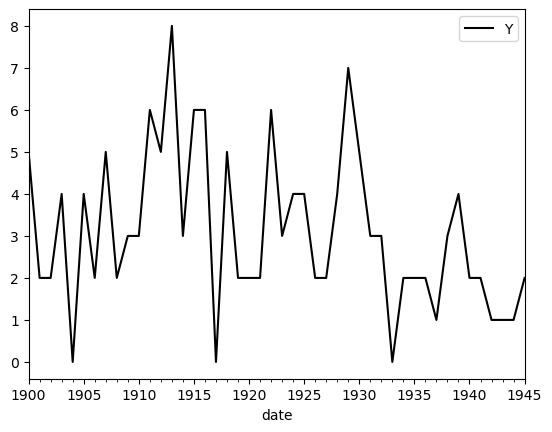

In [149]:
early_twentieth_century.plot(color = 'black')
plt.show()

Volvamos al dataset original de las emisiones de co2

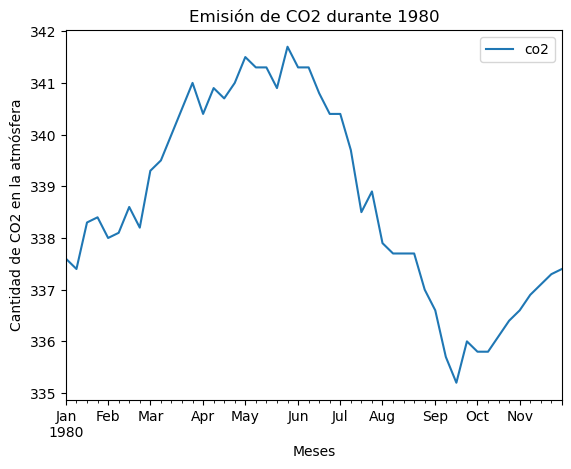

In [150]:
# Podemos hacer subset de algunos meses dentro del año
nineteen_eighty = co_2['1980-01-01':'1980-12-01']

ax = nineteen_eighty.plot()

ax.set_xlabel('Meses')

ax.set_ylabel('Cantidad de CO2 en la atmósfera')

ax.set_title('Emisión de CO2 durante 1980')

plt.show()

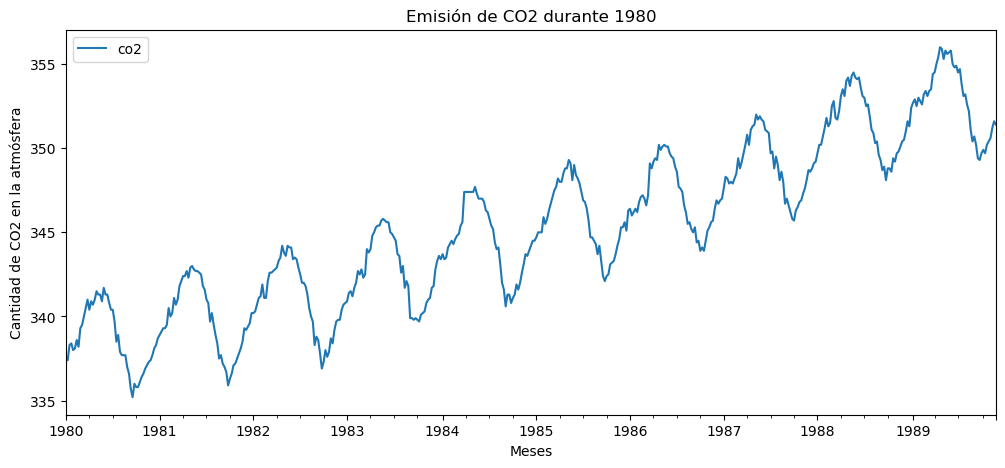

In [151]:
# Hagamos un subset desde el inicio de 1980 hasta 1989
eighties = co2_levels['1980-01-01':'1989-12-01']
ax = eighties.plot(figsize=(12,5)) # ajustamos el tamaño del canva

ax.set_xlabel('Meses')

ax.set_ylabel('Cantidad de CO2 en la atmósfera')

ax.set_title('Emisión de CO2 durante 1980')

plt.show()

## <a id='2.2.'> 2.2. Añadir líneas en las gráficas </a>  

En ocasiones vamos a querer indicar puntos importantes dentro de nuestro gráfico, nos funciones nos van a ser útiles para ello: axvline y axhline.

- **axvline:** Es útil para resaltar o marcar valores específicos en el eje 'x' de un gráfico, como puntos de referencia, umbrales o eventos importantes. Proporciona una manera efectiva de visualizar y comparar datos en relación con una línea vertical de referencia.
- **ahvline:** Es útil para resaltar o marcar valores específicos en el eje 'y' de un gráfico, como valores de referencia, límites o puntos críticos. Facilita la comparación visual de datos con una línea horizontal de referencia.

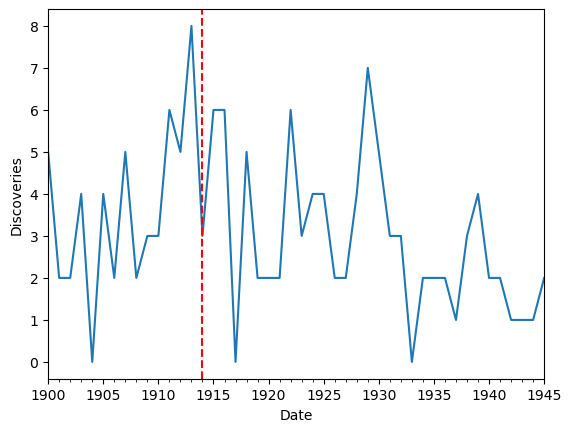

In [47]:
# Utilizamos axvline 
ax = early_twentieth_century.plot(legend = None)

ax.set_xlabel('Date')

ax.set_ylabel('Discoveries')

ax.axvline(x = '1914-01-01', color = 'red', linestyle = '--') # Podemos indicar eventos importantes

plt.show()

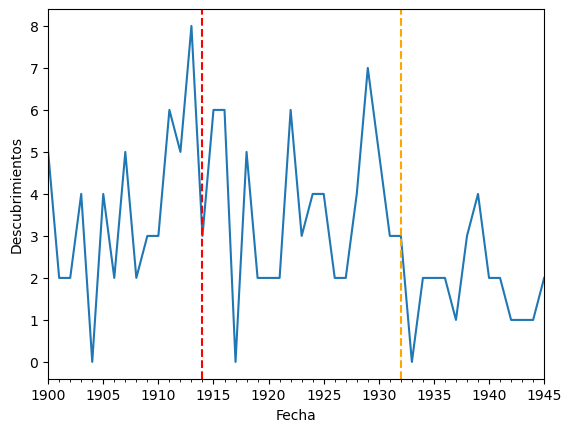

In [48]:
ax = early_twentieth_century.plot(legend = None)
ax.set_xlabel('Fecha')

ax.set_ylabel('Descubrimientos')

ax.axvline(x = '1914-01-01', color = 'red', linestyle = '--') # Indicamos una fecha histórica

ax.axvline(x = '1932-01-01', color = 'orange', linestyle = '--') # Podemos indicar varias líneas en una sola gráfica

plt.show()

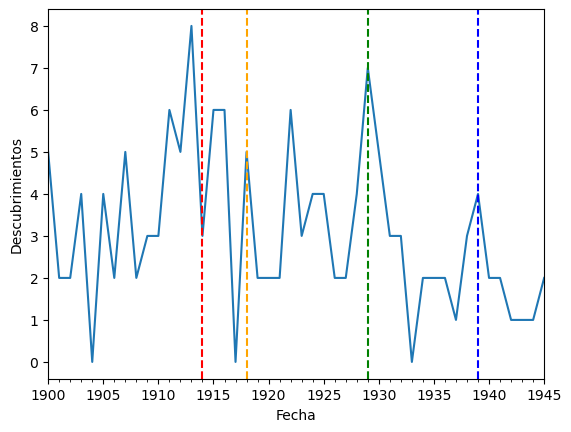

In [153]:
ax = early_twentieth_century.plot(legend = None)

ax.set_xlabel('Fecha')

ax.set_ylabel('Descubrimientos')

fechas_historicas = ['1914-01-01', '1918-01-01', '1929-01-01', '1939-01-01']

colores = ['red', 'orange', 'green', 'blue']

for fecha, color in zip(fechas_historicas, colores): # Zipea la info de fechas históricas y colores
    ax.axvline(x=fecha, color=color, linestyle='--') # Se combina la lista de fechas históricas y de coloresen un formato que puede ser utilizado en un bucle

plt.show()

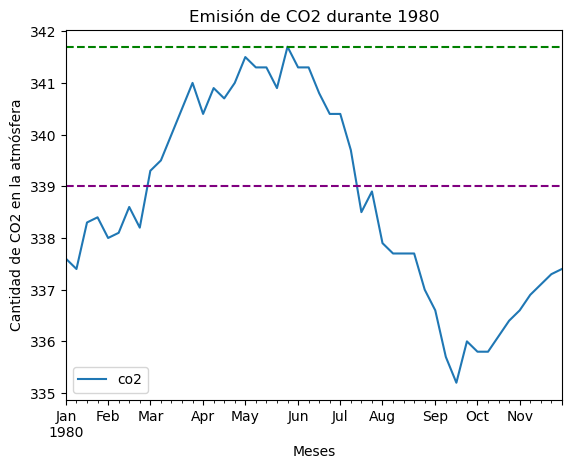

In [50]:
# Podemos añadir líneas horizontales con axhline
nineteen_eighty = co_2['1980-01-01':'1980-12-01']

ax = nineteen_eighty.plot()

ax.set_xlabel('Meses')

ax.set_ylabel('Cantidad de CO2 en la atmósfera')

ax.set_title('Emisión de CO2 durante 1980')

ax.axhline(y = 339, color = 'purple', linestyle = '--')

ax.axhline(y = 341.7, color = 'green', linestyle = '--')

plt.show()


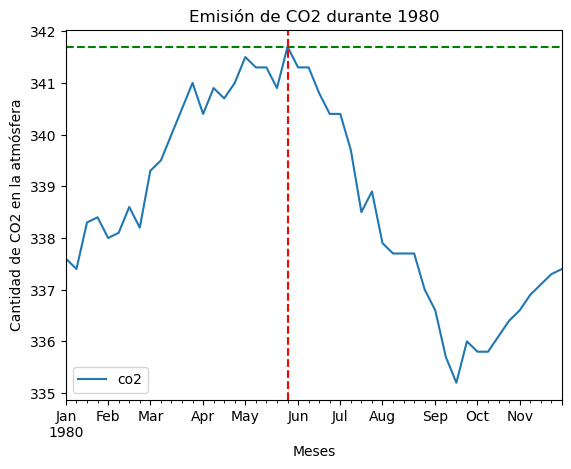

In [51]:
ax = nineteen_eighty.plot()

ax.set_xlabel('Meses')

ax.set_ylabel('Cantidad de CO2 en la atmósfera')

ax.set_title('Emisión de CO2 durante 1980')

ax.axhline(y = 341.7, color = 'green', linestyle = '--')

ax.axvline(x = '1980-05-31', color = 'red', linestyle = '--')

plt.show()


In [52]:
#nineteen_eighty.min()
#nineteen_eighty[nineteen_eighty['co2'] == 335.2]

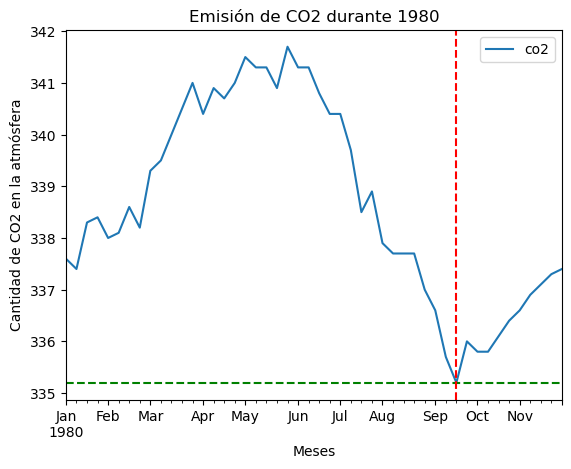

In [53]:
ax = nineteen_eighty.plot()

ax.set_xlabel('Meses')

ax.set_ylabel('Cantidad de CO2 en la atmósfera')

ax.set_title('Emisión de CO2 durante 1980')

ax.axhline(y = 335.2, color = 'green', linestyle = '--')

ax.axvline(x = '1980-09-20', color = 'red', linestyle = '--')

plt.show()

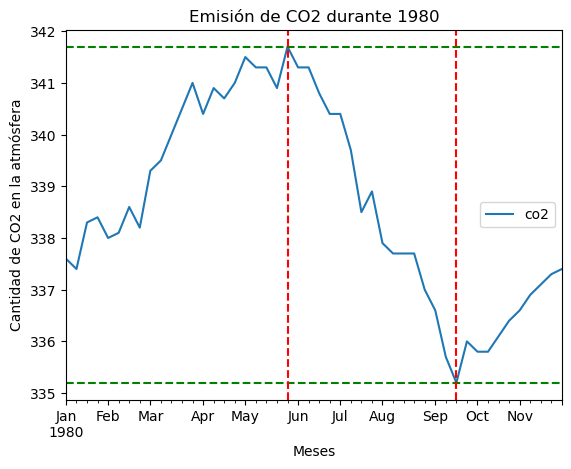

In [154]:
ax = nineteen_eighty.plot()

ax.set_xlabel('Meses')

ax.set_ylabel('Cantidad de CO2 en la atmósfera')

ax.set_title('Emisión de CO2 durante 1980')

ax.axhline(y = 341.7, color = 'green', linestyle = '--')

ax.axhline(y = 335.2, color = 'green', linestyle = '--')

ax.axvline(x = '1980-05-31', color = 'red', linestyle = '--')  # year 1980-05-31

ax.axvline(x = '1980-09-20', color = 'red', linestyle = '--')  # year 1980-09-20

plt.show()

## <a id='2.3.'> 2.3. Sombrear regiones en tu gráfica </a> 

Utilizamos el comando axvspan y axhspan

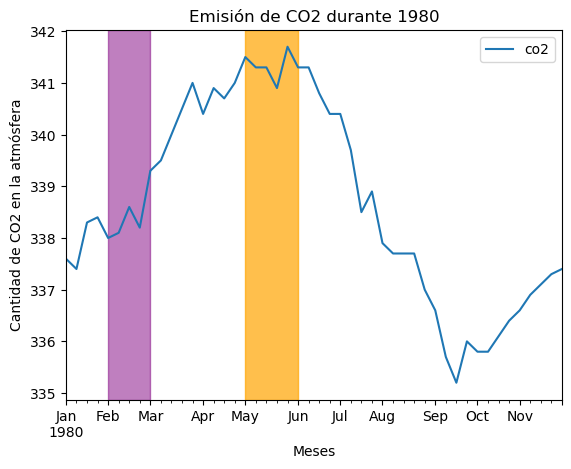

In [159]:
plt.style.use('default')

ax = nineteen_eighty.plot()

ax.set_xlabel('Meses')

ax.set_ylabel('Cantidad de CO2 en la atmósfera')

ax.set_title('Emisión de CO2 durante 1980')

# Podemos sombrear el área desde mayo de 1980 (1980-05-31) hasta septiembre de 1980 (1980-09-20)
ax.axvspan('1980-02-01', '1980-03-01', color = 'purple', alpha = 0.5)

ax.axvspan('1980-05-01', '1980-06-01', color='orange', alpha=0.7)


plt.show()

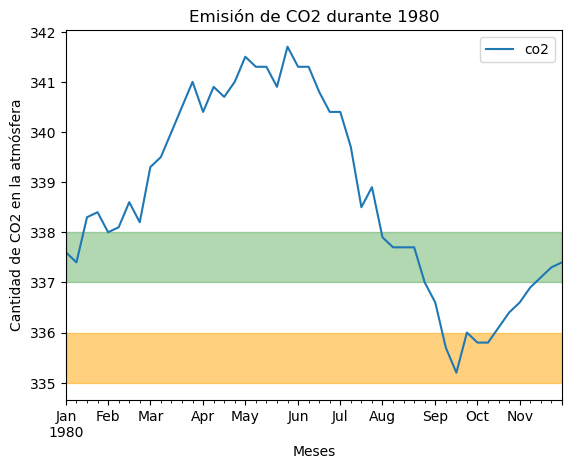

In [160]:
# We can also highlight horizontally from one value to another
plt.style.use('default')

ax = nineteen_eighty.plot()

ax.set_xlabel('Meses')

ax.set_ylabel('Cantidad de CO2 en la atmósfera')

ax.set_title('Emisión de CO2 durante 1980')

ax.axhspan(335, 336, color = 'orange', alpha = 0.5)

ax.axhspan(338, 337, color = 'green', alpha = 0.3) 

plt.show()

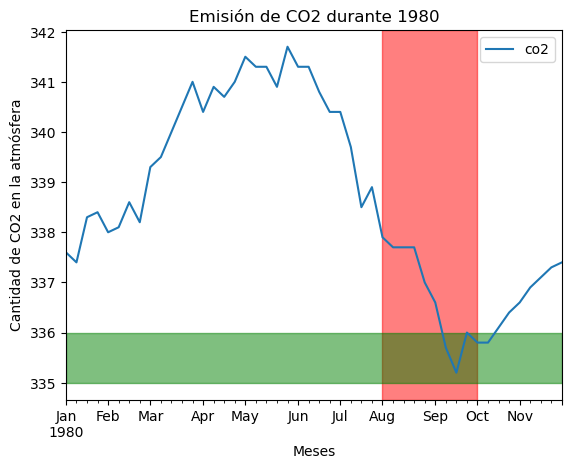

In [162]:
plt.style.use('default')

ax = nineteen_eighty.plot()

ax.set_xlabel('Meses')

ax.set_ylabel('Cantidad de CO2 en la atmósfera')

ax.set_title('Emisión de CO2 durante 1980')

ax.axvspan('1980-08-01', '1980-10-01', color = 'red', alpha = 0.5)

ax.axhspan(335, 336, color = 'green', alpha = 0.5)

plt.show()

## <a id='2.4.'> 2.4. Agregar anotaciones </a> 

In [164]:
# ¿Y si queremos resaltar el valor medio? 
mean_nineteen_eighty = nineteen_eighty.mean()

In [59]:
mean_nineteen_eighty.iloc[0]

338.68333333333334

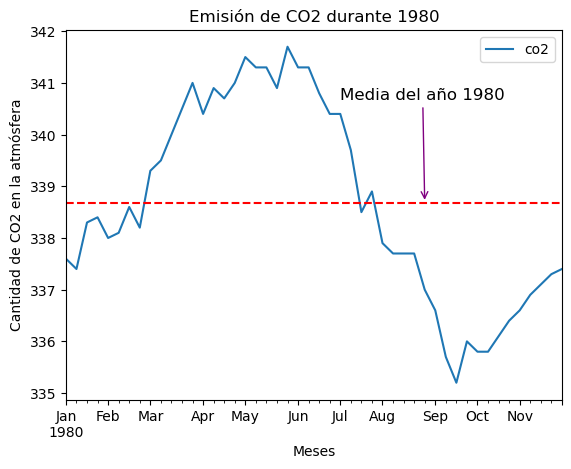

In [166]:
ax = nineteen_eighty.plot()

ax.set_xlabel('Meses')

ax.set_ylabel('Cantidad de CO2 en la atmósfera')

ax.set_title('Emisión de CO2 durante 1980')

ax.axhline(y = mean_nineteen_eighty.iloc[0], color = 'red', linestyle = '--') 

# Agregar una anotación
ax.annotate('Media del año 1980', xy=('1980-08-30', mean_nineteen_eighty.iloc[0]),
            xytext=('1980-06-30', mean_nineteen_eighty.iloc[0] + 2), fontsize=12,
            color='black', arrowprops=dict(arrowstyle='->', color='purple'))

#ax.annotate('Valor medio', xy = ('1980-07-20', 338.68),
            #xytext=('1980-06-30', 340), fontsize = 10, color = 'red', arrowprops = dict(arrowstyle='->', color='black'))


plt.show()

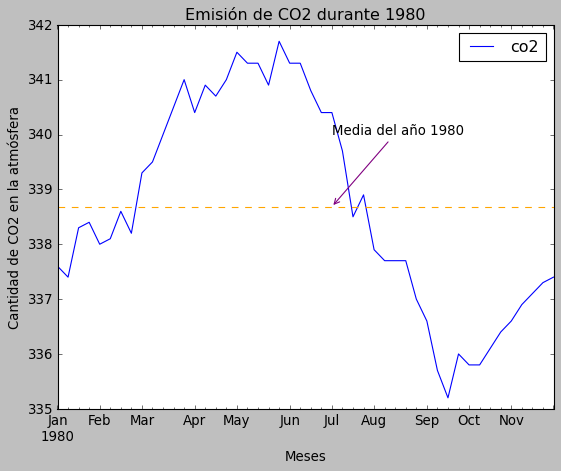

In [201]:
ax = nineteen_eighty.plot()

ax.set_xlabel('Meses')

ax.set_ylabel('Cantidad de CO2 en la atmósfera')

ax.set_title('Emisión de CO2 durante 1980')

ax.annotate('Media del año 1980', xy=('1980-06-30', 338.6833),
            xytext=('1980-06-30', 340), fontsize=12,
            color='black', arrowprops=dict(arrowstyle='->', color='purple')) 

ax.axhline(y = 338.683333, color = 'orange', linestyle = '--') # Otra forma

plt.show()

#  <a id='t3'> 3. Graficar agregados de los datos </a>

## <a id='3.1.'> 3.1. Graficar el rolling average </a>  

La ventana móvil, también conocida como media móvil, es una técnica muy utilizada en el campo del análisis de series temporales.
Puede utilizarse para
- Suavizar los datos (a corto plazo)
- Eliminar valores atípicos
- Destacar tendencias de largo plazo

Podemos obtener la ventana móvil o media móvil de nuestra serie con el comando df.rolling().mean()

In [167]:
# Utilizamos el comando df.rolling().mean()
co2_levels_mean = co2_levels.rolling(window = 52).mean() 

# la ventana móvil depende de cómo trabaje con sus datos
# En este caso seleccionamos ventana = 52 para obtener la media móvil anual (52 semanas en un año)
# Esto corresponde a una ventana móvil anual, suponiendo que sus datos tengan una frecuencia de un punto de datos por semana.
# Por ejemplo, si trabajáramos con datos diarios, especificaríamos ventana = 7 para obtener la media móvil semanal


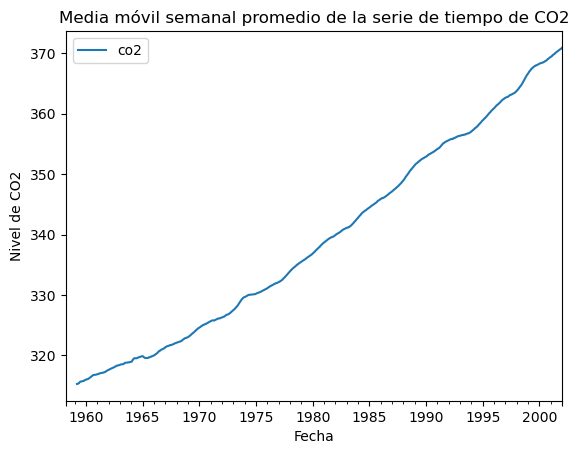

In [170]:
# Graficando la media móvil podemos ver el ciclo o tendencia a largo plazo de la serie temporal
ax = co2_levels_mean.plot()

ax.set_xlabel('Fecha')

ax.set_ylabel('Nivel de CO2')

ax.set_title('Media móvil semanal promedio de la serie de tiempo de CO2')

plt.show()

La media móvil es útil para suavizar las fluctuaciones de los datos y obtener una visión más clara de la tendencia general. Resulta especialmente útil para identificar patrones a largo plazo y reducir el ruido en los datos de series temporales. Es especialmente útil cuando la serie temporal contiene mucho ruido o valores atípicos.


El parámetro window debe establecerse en función de la desagregación de la serie temporal. Por ejemplo, si la serie contiene datos diarios y busca valores móviles a lo largo de todo un año, debe especificar el parámetro window=365. Además, es fácil obtener valores móviles para otras métricas, como la desviación estándar (.std()) o la varianza (.var()).

In [171]:
# Calcula la media móvil de 52 semanas 
ma = co2_levels.rolling(window = 52).mean()

# Calcula la desviación estándar móvil de 52 semanas del DataFrame co2_levels
mstd = co2_levels.rolling(window=52).std()

In [172]:
# Añade la columna del límite superior al DataFrame MA
ma['upper'] = ma['co2'] + (2 * mstd['co2'])  # mean + (2 * rolling standard deviation)

# Añade la columna del límite inferior al DataFrame MA
ma['lower'] = ma['co2'] - (2 * mstd['co2']) # mean - (2 * rolling standard deviation)

In [66]:
ma

,co2,upper,lower
datestamp,,,
1958-03-29,NaN,NaN,NaN
1958-04-05,NaN,NaN,NaN
1958-04-12,NaN,NaN,NaN
1958-04-19,NaN,NaN,NaN
1958-04-26,NaN,NaN,NaN
...,...,...,...
2001-12-01,370.738462,374.602860,366.874063
2001-12-08,370.761538,374.612518,366.910559
2001-12-15,370.798077,374.628500,366.967654


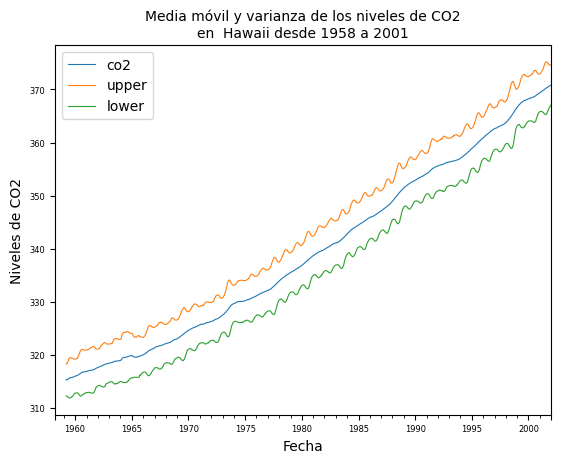

In [173]:
# Graficamos el Dataframe MA
ax = ma.plot(linewidth=0.8, fontsize=6)

ax.set_xlabel('Fecha', fontsize=10)

ax.set_ylabel('Niveles de CO2', fontsize=10)

ax.set_title('Media móvil y varianza de los niveles de CO2\nen  Hawaii desde 1958 a 2001', fontsize=10)

plt.show()

## <a id='3.2.'> 3.2. Graficar datos agregados por año </a>

En ocasiones, vamos a querer agregar los datos de una serie temporal en subconjuntos más pequeños para obtener información más detallada o identificar patrones estacionales.
Después de agrupar los datos mensuales y calcular el promedio de CO2 para cada mes, generamos un gráfico que muestra claramente la tendencia estacional en los niveles de CO2 a lo largo del año.

In [174]:
# Obtenemos el índice de los meses del año
index_month = co2_levels.index.month 
index_month 

Index([ 3,  4,  4,  4,  4,  5,  5,  5,  5,  5,
       ...
       10, 11, 11, 11, 11, 12, 12, 12, 12, 12],
      dtype='int32', name='datestamp', length=2284)

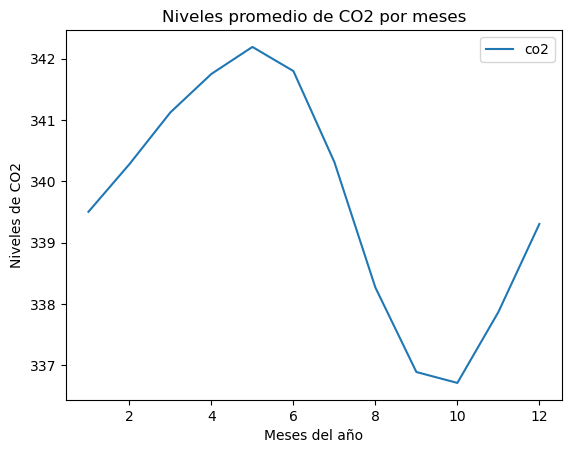

In [175]:
# Agrupamos por meses, obtenemos la media y lo graficamos
co2_levels_by_month = co2_levels.groupby(index_month).mean() 

co2_levels_by_month.plot()

plt.title('Niveles promedio de CO2 por meses')

plt.ylabel('Niveles de CO2')

plt.xlabel('Meses del año')

plt.show()

# Obtenemos un gráfico similar al de 1980, pero suavizado 

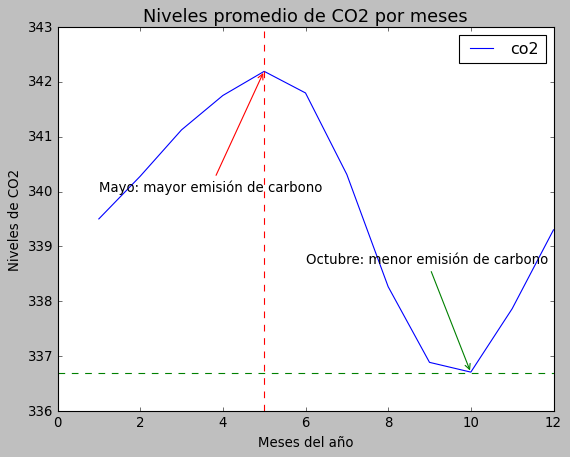

In [176]:
co2_levels_by_month = co2_levels.groupby(index_month).mean() 

plt.style.use('classic')

co2_levels_by_month.plot(figsize = (8, 6))

plt.title('Niveles promedio de CO2 por meses', fontsize = 16)

plt.ylabel('Niveles de CO2')

plt.xlabel('Meses del año')

plt.axvline(x = 5, linestyle = '--', color = 'red')

plt.annotate('Octubre: menor emisión de carbono', xy=(10, 336.7),
             xytext=(6, 338.6833), fontsize=12,
             color='black', arrowprops=dict(arrowstyle='->', color='green'))

plt.annotate('Mayo: mayor emisión de carbono', xy=(5, 342.2),
             xytext=(1, 340), fontsize=12,
             color='black', arrowprops=dict(arrowstyle='->', color='red'))

plt.axhline(y = 336.7, linestyle = '--',  color = 'green')

plt.show()

#  <a id='t4'> 4. Graficar estadísticas y sintetizar la información </a>
Si bien graficar y realizar anotaciones a los datos de series de tiempo es útil para compartir información, también es fundamental que recopile estadísticas de la serie de tiempo con la que estamos trabajando. Así podremos compartir y discutir las propiedades estadísticas de sus datos, lo cual puede apoyar a los gráficos que generemos y a las hipótesis que deseeamos comunicar.

Podemos usar df.describe() para obtener las principales estadísticas descriptivas

In [177]:
co_2.describe() # Principales estadísticas del dataframe

,co2
count,2225.000000
mean,340.142247
std,17.003885
min,313.000000
25%,324.800000
50%,338.300000
75%,354.800000
max,373.900000


In [178]:
co2_levels.describe()

,co2
count,2284.000000
mean,339.657750
std,17.100899
min,313.000000
25%,323.975000
50%,337.700000
75%,354.500000
max,373.900000


In [179]:
discoveries.describe()

,Y
count,100.000000
mean,3.100000
std,2.254065
min,0.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,12.000000


In [72]:
# Imprimimos las principales estadísticas de co2_levels
print(co2_levels.describe())

               co2
count  2284.000000
mean    339.657750
std      17.100899
min     313.000000
25%     323.975000
50%     337.700000
75%     354.500000
max     373.900000


In [180]:
co2_levels.mean()

co2    339.65775
dtype: float64

In [181]:
co2_levels.std()

co2    17.100899
dtype: float64

In [73]:
# Imprimimos los mínimos de la columna co2 en el DataFrame co2_levels
print(co2_levels.min())

co2    313.0
dtype: float64


In [74]:
# Imprimimos los máximos de la columna co2 en el DataFrame co2_levels
print(co2_levels.max())

co2    373.9
dtype: float64


## <a id='4.1.'> 4.1. Graficar boxplots (gráficos de caja) </a>
Los boxplots muestran la mediana, los cuartiles y la variabilidad de los datos, lo que facilita la identificación de tendencias centrales y valores atípicos en una distribución. Estos gráficos son particularmente útiles para comparar múltiples distribuciones de datos o identificar patrones y diferencias en un solo vistazo.

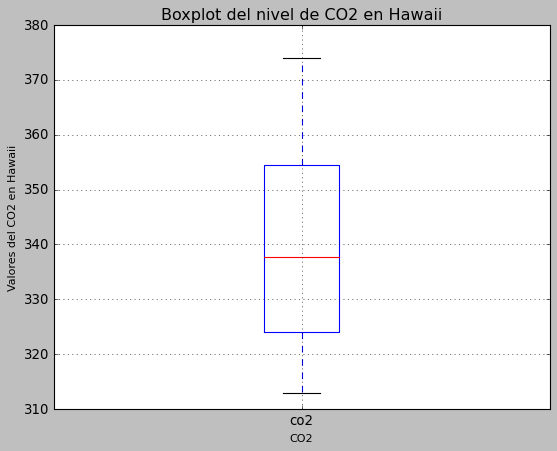

In [185]:
plt.style.use('classic')

# Generamos el boxplot
ax = co2_levels.boxplot()

ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Valores del CO2 en Hawaii', fontsize=10)
ax.set_title('Boxplot del nivel de CO2 en Hawaii')
plt.show()

El boxplot está destacando características clave como la mediana, los cuartiles y los valores atípicos. Las líneas que se extienden en paralelo desde las cajas se denominan comúnmente "bigotes" o "whiskers" en inglés, y se utilizan para indicar la variabilidad fuera de los cuartiles superior (que es el percentil del 75%) e inferior (que es el percentil del 25%), es decir, los valores atípicos.

Text(0.5, 1.0, 'Boxplot del nivel de CO2 en Hawaii')

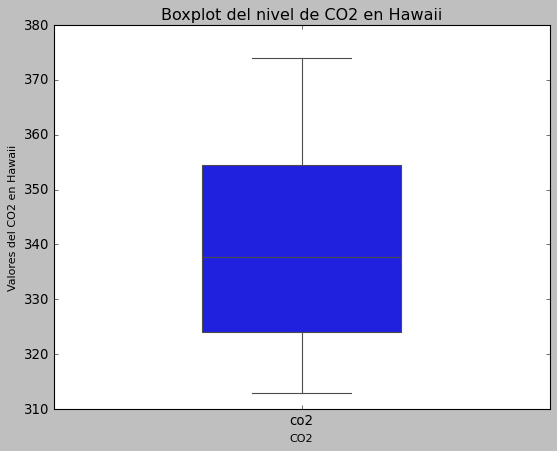

In [191]:
# También se puede realizar utilizando seaborn
plt.figure(figsize=(8, 6))

sns.boxplot(co2_levels, width=0.4)

plt.xlabel('CO2', fontsize=10)

plt.ylabel('Valores del CO2 en Hawaii', fontsize=10)

plt.title('Boxplot del nivel de CO2 en Hawaii')


## <a id='4.2.'> 4.2. Graficar histogramas </a>

Los histogramas son una representación visual efectiva de la distribución de datos en un conjunto, permitiendo identificar rápidamente la concentración de valores en diferentes intervalos o "bins". Al mostrar la frecuencia con la que ocurren los valores en cada bin, los histogramas destacan la tendencia central de los datos y la forma general de su distribución, ya sea simétrica, sesgada o multimodal. 


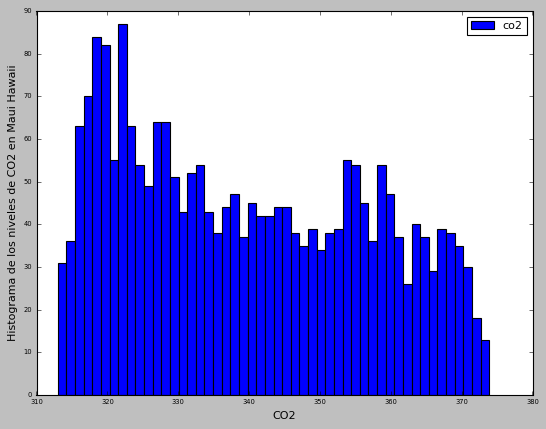

In [196]:
# Generamos un histograma
ax = co2_levels.plot(kind='hist', bins = 50, fontsize=6)

ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Histograma de los niveles de CO2 en Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

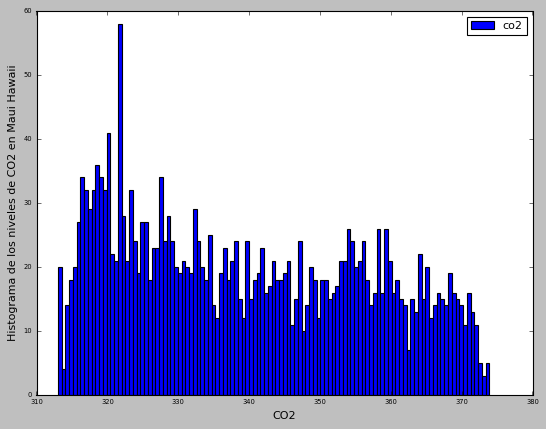

In [197]:
ax = co2_levels.plot(kind='hist', bins = 115, fontsize=6)

ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Histograma de los niveles de CO2 en Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

## <a id='4.3.'> 4.3. Crear gráficos de densidad </a>
Los gráficos de densidad ofrecen una perspectiva detallada de la distribución de datos al visualizar la concentración de valores a lo largo de una variable continua. Nos permiten observar las tendencias centrales y las formas de distribución con mayor suavidad y precisión que los histogramas. 
Al presentar la densidad de probabilidad de los datos, los gráficos de densidad resaltan la presencia de múltiples modas o picos, la simetría o asimetría en la distribución, y las áreas de alta concentración de datos. 

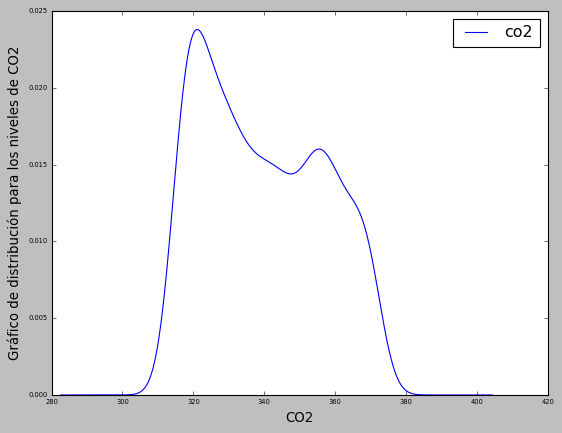

In [198]:
ax = co2_levels.plot(kind='density', linewidth = 1, fontsize = 6)

ax.set_xlabel('CO2')

ax.set_ylabel('Gráfico de distribución para los niveles de CO2')

plt.show()

#  <a id='t5'> 5. Descomponer las series de tiempo </a>
Las series de tiempo usualmente se descomponen en un componente estacional (seasonal), un componente tendencial (trend) y uno irregular (noise). Anteriormente vimos una manera de separar la tendencia de largo plazo por medio del rolling window o de graficar  el componente estacional agregando los datos por año. Ahora veremos otra manera de descomponer las series en estas tres partes.

La "estacionalidad" se refiere a patrones cíclicos y recurrentes en los datos, que pueden deberse a factores estacionales, como las estaciones del año o eventos regulares. La "tendencia" muestra la dirección general de los datos a lo largo del tiempo, revelando si los valores tienden a aumentar o disminuir con el tiempo. Por último, el "ruido" representa la variabilidad aleatoria o irregular que no se puede atribuir a la estacionalidad ni a la tendencia, y a menudo se considera como un componente aleatorio en los datos.

Utilizaremos la función seasonal_decompose() de statsmodels.api para realizar la descomposición


$y_t = t_t + c_t + s_t + e_t$

In [207]:
# Importamos statsmodels que nos será útil para la descomposición 
import statsmodels.api as sm

In [208]:
descomposicion = sm.tsa.seasonal_decompose(co2_levels)

In [209]:
print(dir(descomposicion))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_observed', '_resid', '_seasonal', '_trend', '_weights', 'nobs', 'observed', 'plot', 'resid', 'seasonal', 'trend', 'weights']


In [210]:
descomp_trend = descomposicion.trend

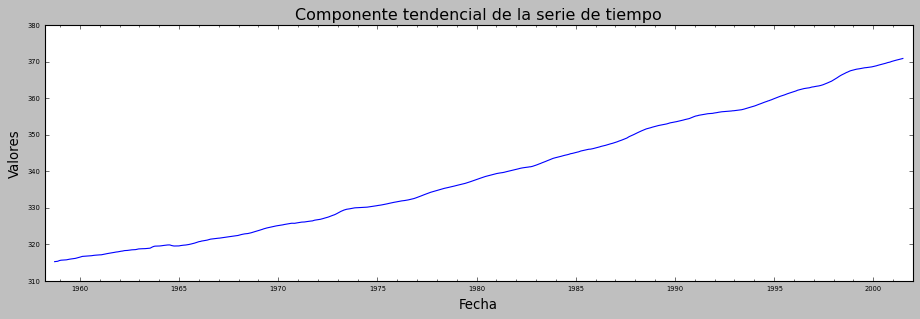

In [84]:
ax = descomp_trend.plot(figsize = (14,4), fontsize=6)
ax.set_xlabel('Fecha')
ax.set_ylabel('Valores')
ax.set_title('Componente tendencial de la serie de tiempo')
plt.show()

In [85]:
descomp_seasonal = descomposicion.seasonal

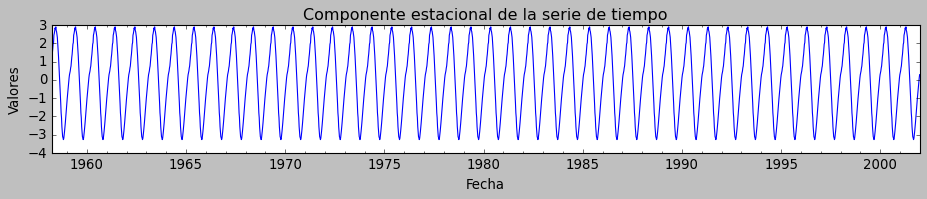

In [86]:
ax = descomp_seasonal.plot(figsize = (14,2))
ax.set_xlabel('Fecha')
ax.set_ylabel('Valores')
ax.set_title('Componente estacional de la serie de tiempo')
plt.show()

In [87]:
descomp_resid = descomposicion.resid

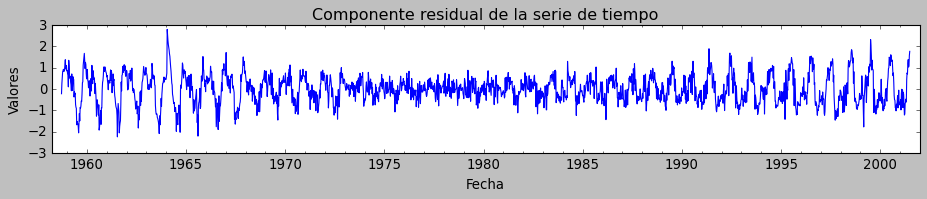

In [88]:
ax = descomp_resid.plot(figsize = (14,2))
ax.set_xlabel('Fecha')
ax.set_ylabel('Valores')
ax.set_title('Componente residual de la serie de tiempo')
plt.show()

#  <a id='t6'> 6. Graficar múltiples series de tiempo </a>

plt.subplots() en Matplotlib permite crear una figura y uno o más ejes (subgráficos) dentro de esa figura. El número de filas y columnas de subgráficos se controla mediante los argumentos de la función. Por ejemplo, plt.subplots(2,2) crea un gráfico con dos filas y dos columnas, lo cual nos permitiría tener cuatro gráficas en un canva. Esto es útil para crear visualizaciones múltiples o comparar diferentes conjuntos de datos en una sola figura, todo controlado desde la figura principal y sus ejes secundarios.

Es posible que queramos graficar datos que comparten las mismas fechas en un mismo gráfico para identificar correlaciones o patrones en múltiples series de datos. Sin embargo, cuando los datos tienen escalas muy diferentes, la representación conjunta puede dificultar la interpretación. 

En esos casos, podemos utilizar ax.twinx() para utilizar el mismo eje para trazar dos series de tiempo diferentes

Esta función nos permite superponer dos ejes yuxtapuestos en un solo gráfico, cada uno con su propia escala y rango de valores, lo que facilita la comparación de series de datos con unidades o magnitudes distintas. 

In [211]:
cbi_ipc = pd.read_excel('databases\cbi_ipc.xlsx') # Leemos la base de datos

In [212]:
cbi_ipc['Year'] = pd.to_datetime(cbi_ipc['Year'], format = "%Y") # Realizamos la transformación del database como vimos al inicio

In [213]:
cbi_ipc = cbi_ipc.set_index('Year') # Creamos el índice DataTime

In [214]:
cbi_ipc.index

DatetimeIndex(['1980-01-01', '1980-01-01', '1980-01-01', '1980-01-01',
               '1981-01-01', '1981-01-01', '1981-01-01', '1981-01-01',
               '1982-01-01', '1982-01-01',
               ...
               '2018-01-01', '2018-01-01', '2019-01-01', '2019-01-01',
               '2019-01-01', '2019-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01'],
              dtype='datetime64[ns]', name='Year', length=164, freq=None)

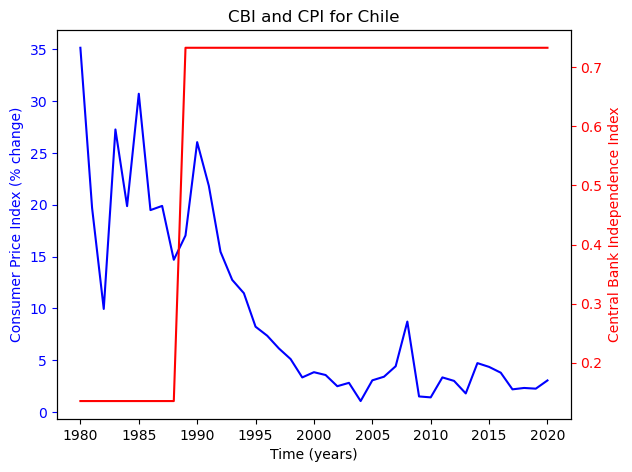

In [218]:
plt.style.use('default')

fig, ax = plt.subplots()

ax.set_title('CBI and CPI for Chile')

ax.plot(cbi_ipc[cbi_ipc["Country"] == "Chile"].index, cbi_ipc[cbi_ipc["Country"] == "Chile"].CPI, linewidth = 1.5, color = 'blue')

ax.set_xlabel('Time (years)')

ax.set_ylabel('Consumer Price Index (% change)', color = 'blue')

ax.tick_params('y', colors = 'blue')

ax2 = ax.twinx()

ax2.plot(cbi_ipc[cbi_ipc["Country"] == "Chile"].index, cbi_ipc[cbi_ipc["Country"] == "Chile"].CBI, linewidth = 1.5, color = 'red')

ax2.set_xlabel('Time (years)')

ax2.set_ylabel('Central Bank Independence Index', color = 'red')

ax2.tick_params('y', colors = 'red')

fig.tight_layout(pad=1.0)

plt.savefig("images\CPI and CBI for Chile.png")

plt.show()

In [219]:
def graficar_seriesdetiempo(axes, x, y, color, xlabel, ylabel):
    
    ''' Esta función grafica una serie de tiempo, toma el axes, los valores del eje x, los valores del el eje y, el color y los nombres de los ejes
        
        Argumentos:
        
        axes: El axes con el que se está trabajando
        x: Fechas del eje x (usualmente va el índice)
        y: Valores del eje y
        color: Color del axes
        xlabel: Nombre del eje x
        ylabel: Nombre del eje y
    
    '''
    
    axes.plot(x, y, color = color)
    
    axes.set_xlabel(xlabel)
    
    axes.set_ylabel(ylabel, color = color)
    
    axes.tick_params(axis = 'y', colors = color)
    

    

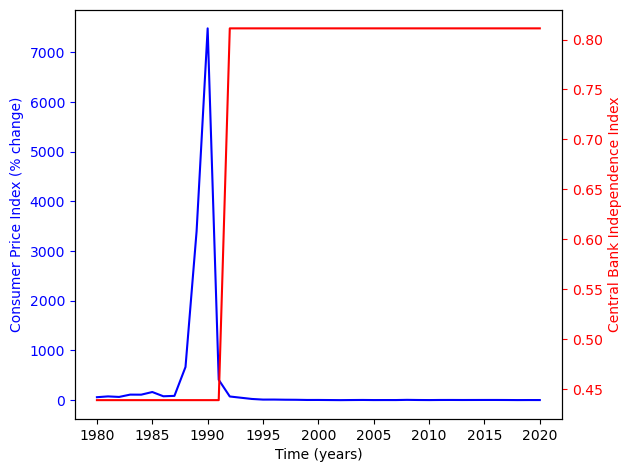

In [220]:
plt.style.use('default')

fig, ax = plt.subplots()

graficar_seriesdetiempo(ax, cbi_ipc[cbi_ipc["Country"] == "Peru"].index, cbi_ipc[cbi_ipc["Country"] == "Peru"].CPI, 
                        "blue", 'Time (years)', 'Consumer Price Index (% change)')

ax2 = ax.twinx()

graficar_seriesdetiempo(ax2, cbi_ipc[cbi_ipc["Country"] == "Peru"].index, cbi_ipc[cbi_ipc["Country"] == "Peru"].CBI, 
                        "red", 'Time (years)', 'Central Bank Independence Index')

fig.tight_layout(pad=1.0)

plt.savefig("images\CPI and CBI for Peru.png")

plt.show()

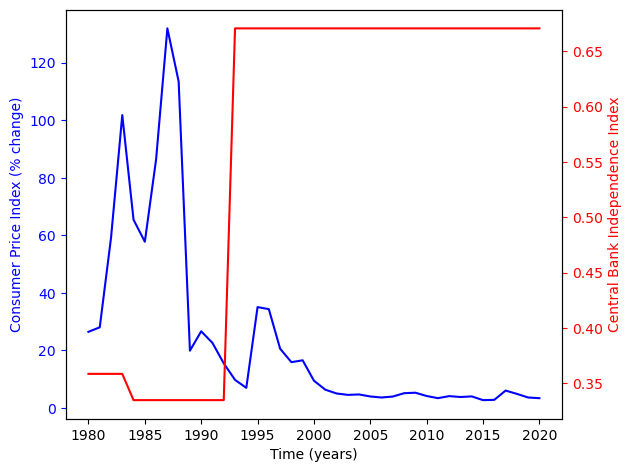

In [221]:
plt.style.use('default')

fig, ax = plt.subplots()

graficar_seriesdetiempo(ax, cbi_ipc[cbi_ipc["Country"] == "Mexico"].index, cbi_ipc[cbi_ipc["Country"] == "Mexico"].CPI, 
                        "blue", 'Time (years)', 'Consumer Price Index (% change)')

ax2 = ax.twinx()

graficar_seriesdetiempo(ax2, cbi_ipc[cbi_ipc["Country"] == "Mexico"].index, cbi_ipc[cbi_ipc["Country"] == "Mexico"].CBI, 
                        "red", 'Time (years)', 'Central Bank Independence Index')

fig.tight_layout(pad=1.0)

plt.savefig("images\CPI and CBI for Mexico.png")

plt.show()

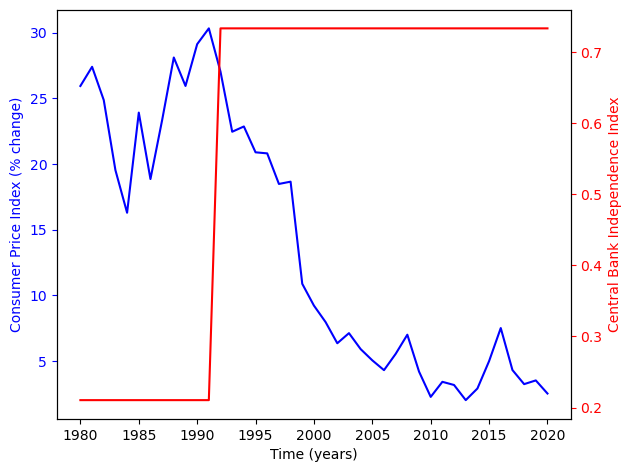

In [222]:
plt.style.use('default')

fig, ax = plt.subplots()

graficar_seriesdetiempo(ax, cbi_ipc[cbi_ipc["Country"] == "Colombia"].index, cbi_ipc[cbi_ipc["Country"] == "Colombia"].CPI, 
                        "blue", 'Time (years)', 'Consumer Price Index (% change)')

ax2 = ax.twinx()

graficar_seriesdetiempo(ax2, cbi_ipc[cbi_ipc["Country"] == "Colombia"].index, cbi_ipc[cbi_ipc["Country"] == "Colombia"].CBI, 
                        "red", 'Time (years)', 'Central Bank Independence Index')

fig.tight_layout(pad=1.0)

plt.savefig("images\CPI and CBI for Colombia.png")

plt.show()

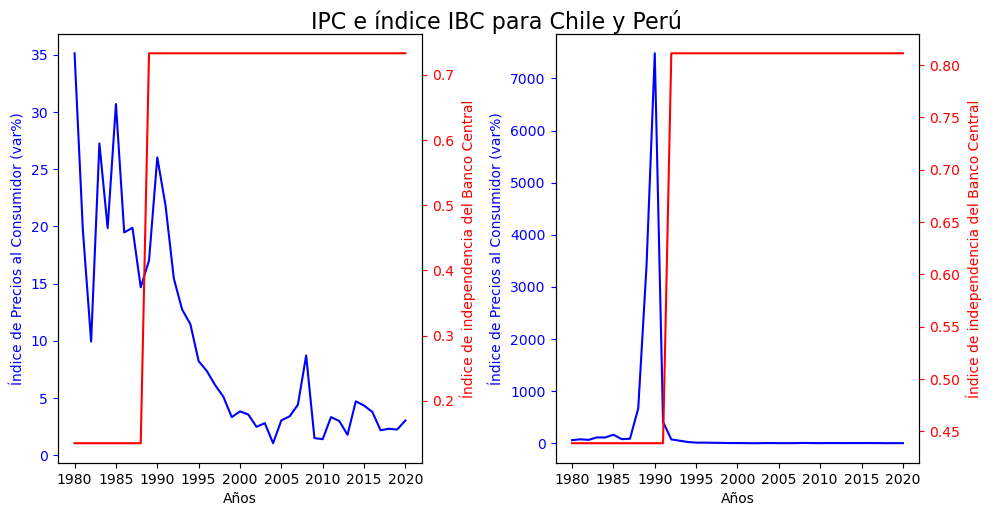

In [225]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

graficar_seriesdetiempo(axs[0], cbi_ipc[cbi_ipc["Country"] == "Chile"].index, cbi_ipc[cbi_ipc["Country"] == "Chile"].CPI, 
                        "blue", 'Años', 'Índice de Precios al Consumidor (var%)')

ax1 = axs[0].twinx()

graficar_seriesdetiempo(ax1, cbi_ipc[cbi_ipc["Country"] == "Chile"].index, cbi_ipc[cbi_ipc["Country"] == "Chile"].CBI, 
                        "red", 'Años', 'Índice de independencia del Banco Central')

# Ahora para Perú

graficar_seriesdetiempo(axs[1], cbi_ipc[cbi_ipc["Country"] == "Peru"].index, cbi_ipc[cbi_ipc["Country"] == "Peru"].CPI, 
                        "blue", 'Años', 'Índice de Precios al Consumidor (var%)')

ax2 = axs[1].twinx()

graficar_seriesdetiempo(ax2, cbi_ipc[cbi_ipc["Country"] == "Peru"].index, cbi_ipc[cbi_ipc["Country"] == "Peru"].CBI, 
                        "red", 'Años', 'Índice de independencia del Banco Central')

fig.tight_layout(pad=1.0)
fig.suptitle('IPC e índice IBC para Chile y Perú', y=1.02 , fontsize=16)

plt.savefig("images\IPC y CBI para Chile y Perú.png", bbox_inches='tight', dpi=300)